# Problem Description
A prediction problem for loan origination based on customer's information. This is a supervised classification problem with two classes: the loan is originated / canceled. A measure metric for the prediction result can be the prediction accuracy or the area under the ROC curve.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Explore the data
The raw data is given in .csv format, which can be easily loaded as a pandas DataFrame. Simple statistics show the data contains 252,464 entries. Each data point contains 86 features, which is a mixture of numerical, categorical and timestamp values. Among them, a special feature "EnumListingStatus" is the label for the classification problem.

In [53]:
data = pd.read_csv("new_theorem_data.csv", index_col="ListingID")
pd.set_option('display.max_columns', None)
data.head(10)

,ListingNumber,DateCreditPulled,DateListingStart,DateListingCreation,EnumListingStatus,DolLoanAmountRequested,BoolPartialFundingApproved,CreditGrade,LenderYield,BorrowerRate,NumMonthsTerm,DolMonthlyLoanPayment,FICOScore,ProsperScore,EnumListingCategory,DolMonthlyIncome,BoolIncomeVerifiable,FracDebtToIncomeRatio,StrEmploymentStatus,StrOccupation,NumMonthsEmployed,StrState,StrBorrowerCity,NumPriorProsperLoansActive,NumPriorProsperLoans,DolPriorProsperLoansPrincipalBorrowed,DolPriorProsperLoansPrincipalOutstanding,DolPriorProsperLoansBalanceOutstanding,NumPriorProsperLoansCyclesBilled,NumPriorProsperLoansOnTimePayments,NumPriorProsperLoansLateCycles,NumPriorProsperLoansLatePayments,DolMaxPriorProsperLoan,DolMinPriorProsperLoan,NumPriorProsperLoansEarliestPayOff,NumPriorProsperLoans31dpd,NumPriorProsperLoans61dpd,BoolIsLender,BoolInGroup,EnumChannelCode,NumTrades,NumTradesOpened6,NumTradesDelinqOrPastDue6,NumOpenTradesDelinqOrPastDue6,NumTradesCurr30DPDOrDerog6,NumTradesEver90DPDOrDerog,DolTotalBalanceAllOpenTrades6,DolTotalBalanceOnPublicRecords,DolTotalPaymentAllOpenTrades6,AgeOldestTrade,NumInquiries6MinusLastTwoWeeks,PctTradesNeverDelinquent,NumBankcardTradesOpened12,DolTotalAvailBankcardCredit6,DolTotalBalanceInstallTradesReptd6,NumRealEstateTrades,NumRealPropertyTrades,DolTotalBalanceOpenRevolving6,NumTradesEverDerog,DolMonthlyDebt,NumCurrentDelinquencies,NumDelinquencies84,NumPublicRecordsLast10Years,NumPublicRecords12,DateFirstCredit,NumCreditLines84,NumInquiries6,DolAmountDelinquent,NumCurrentCreditLines,NumOpenCreditLines,PctBankcardUtil,NumOpenRevolvingAccounts,DolRealEstateBalance,DolRevolvingBalance,DolRealEstatePayment,NumTotalInquiries,NumSatisfactoryAccounts,NumWasDelinquentDerog,NumDelinquenciesOver30Days,NumDelinquenciesOver60Days,BoolOwnsHome,EnumLoanFractionalType,DateWholeLoanStart,DateWholeLoanEnd,BoolEverWholeLoan,BoolIsFractionalLoan
ListingID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
973605,973605,2013-10-13 01:50:00,2014-01-26 19:00:00,2013-10-13 01:50:00,7,15000.0,True,B,0.1520,0.1620,60,366.37,689,6.0,1,6000.0000,True,0.27,Employed,Tradesman - Mechanic,445.0,VA,VIRGINIA BCH,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,False,70000,29,1,0,0,0,0,121431,0,1348,419,0,96,4,439,0,2,4,33956,0,1242,0,1,0,0,1978-11-03 08:00:00,35,0,0,11,8,0.97,7,87475,52941,583,5,33,2,8,1,True,3,2014-01-26 18:28:00,NaN,True,False
981099,981099,2013-10-15 15:22:00,2014-01-10 00:00:00,2013-10-15 15:22:00,7,15000.0,True,B,0.1485,0.1585,60,363.58,709,8.0,1,7916.6667,True,0.35,Other,NaN,32.0,CA,ACTON,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,False,70000,50,1,0,0,0,0,698295,0,4845,430,0,100,7,9609,142383,2,4,14852,0,2289,0,0,0,0,1977-12-01 08:00:00,54,0,0,15,14,0.48,10,541060,17064,2611,3,53,1,2,1,True,2,2014-01-09 23:49:00,NaN,True,False
1025766,1025766,2013-11-06 23:09:00,2014-01-22 01:00:00,2013-11-06 23:09:00,6,4000.0,True,D,0.1985,0.2085,36,150.39,669,6.0,1,2083.3333,True,0.53,Employed,Professional,4.0,MN,MINNEAPOLIS,1,3,14400.0,4440.72,4442.52,52.0,52.0,0.0,0.0,8000.0,1400.0,10.0,NaN,NaN,0,False,80000,15,0,0,0,0,1,30590,0,901,100,2,86,5,1498,9788,0,0,20802,1,911,0,2,0,0,2005-07-19 07:00:00,17,2,0,8,7,0.93,5,0,20802,0,5,15,2,3,2,False,1,NaN,NaN,False,True
1003835,1003835,2013-11-08 02:25:00,2014-01-03 00:00:00,2013-11-08 02:25:00,7,10000.0,True,A,0.1199,0.1299,36,336.89,749,5.0,13,3750.0000,True,0.14,Employed,Medical Technician,2.0,OK,OKLAHOMA CITY,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,False,90000,8,1,0,0,0,0,3100,0,223,60,0,100,3,6050,0,0,0,3100,0,223,0,0,0,0,2008-11-04 08:00:00,8,0,0,7,7,0.26,7,0,3100,0,1,8,0,0,0,False,3,2014-01-02 23:47:00,NaN,True,False
1011335,1011335,2013-11-11 22:08:00,2014-01-10 01:02:00,2013-11-11 22:08:00,6,20000.0,True,B,0.1340,0.1440,60,469.52,649,11.0,1,9000.0000,True,0.16,Employed,Executive,90.0,MN,BELLE PLAINE,0,1,2600.0,0.00,0.00,33.0,31.0,2.0,0.0,2600.0,2600.0,34.0,NaN,NaN,0,False,80000,30,1,0,0,0,1,37844,1249,1239,23

In [191]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252469 entries, 973605 to 2573993
Data columns (total 86 columns):
ListingNumber                               252469 non-null int64
DateCreditPulled                            252469 non-null object
DateListingStart                            252469 non-null object
DateListingCreation                         252469 non-null object
EnumListingStatus                           252469 non-null int64
DolLoanAmountRequested                      252469 non-null float64
BoolPartialFundingApproved                  252469 non-null bool
CreditGrade                                 252469 non-null object
LenderYield                                 252469 non-null float64
BorrowerRate                                252469 non-null float64
NumMonthsTerm                               252469 non-null int64
DolMonthlyLoanPayment                       252469 non-null float64
FICOScore                                   252469 non-null int64
ProsperScore  

We want to gain a better understanding of the data from visualization. To do this, we sample a subset of the data and manually pick 9 key features which are believed to be more relevant to the loan origination from emperical knowledge.

In [107]:
sample = data.iloc[np.random.permutation(len(data))[0:5000]].copy()

In [152]:
names = ["DolMonthlyIncome", "FICOScore", "DolLoanAmountRequested", "LenderYield", "BorrowerRate", "DolMonthlyLoanPayment", "FracDebtToIncomeRatio", "NumMonthsEmployed", "DolTotalBalanceAllOpenTrades6"]

From the histogram, we find that Monthly Income and Total Balance contain outliers, which indicates there is a small number of people who have a much higher income and balance. There is also a discontinuity in Lender Yield. The majority has a yield starting from 5%, but a fraction of customers has a 0 yield.

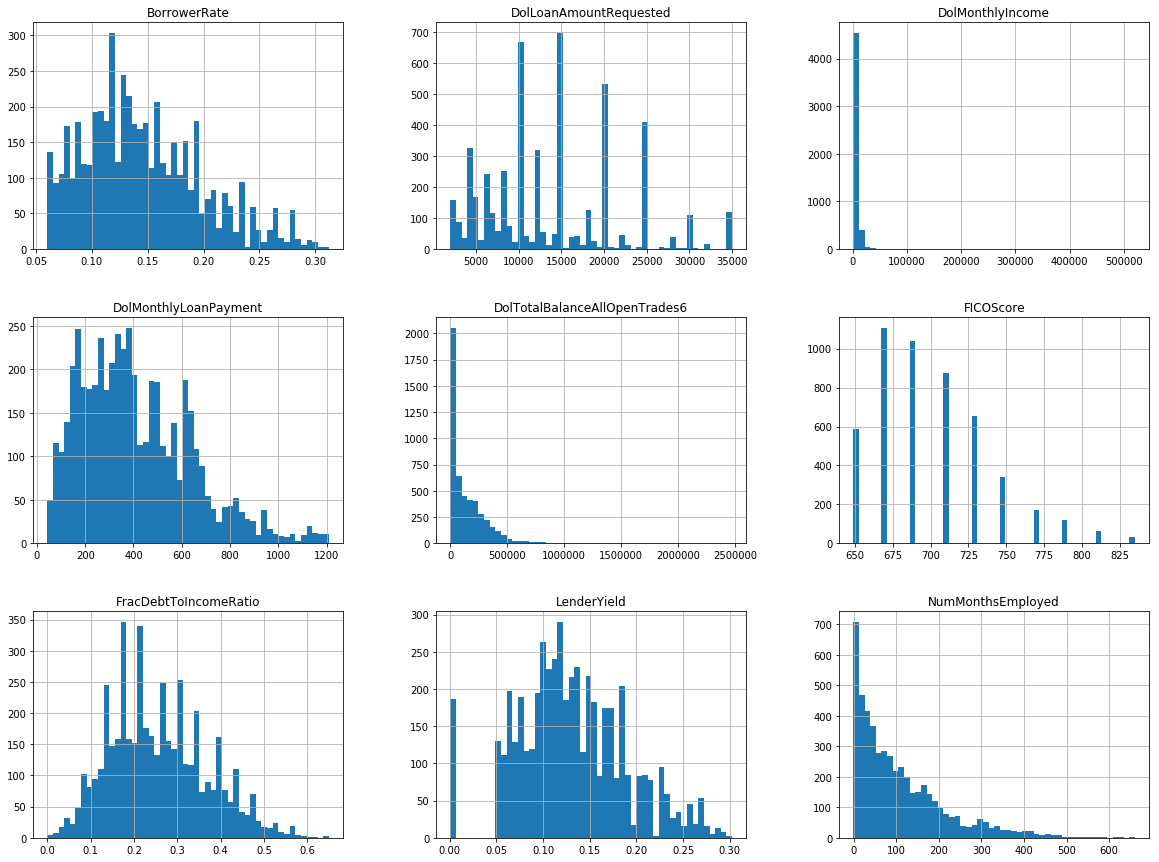

In [153]:
sample[names].hist(bins=50, figsize=(20,15))
plt.show()

The following scatter plot shows the pairwise relation between the features.

/Users/songming/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


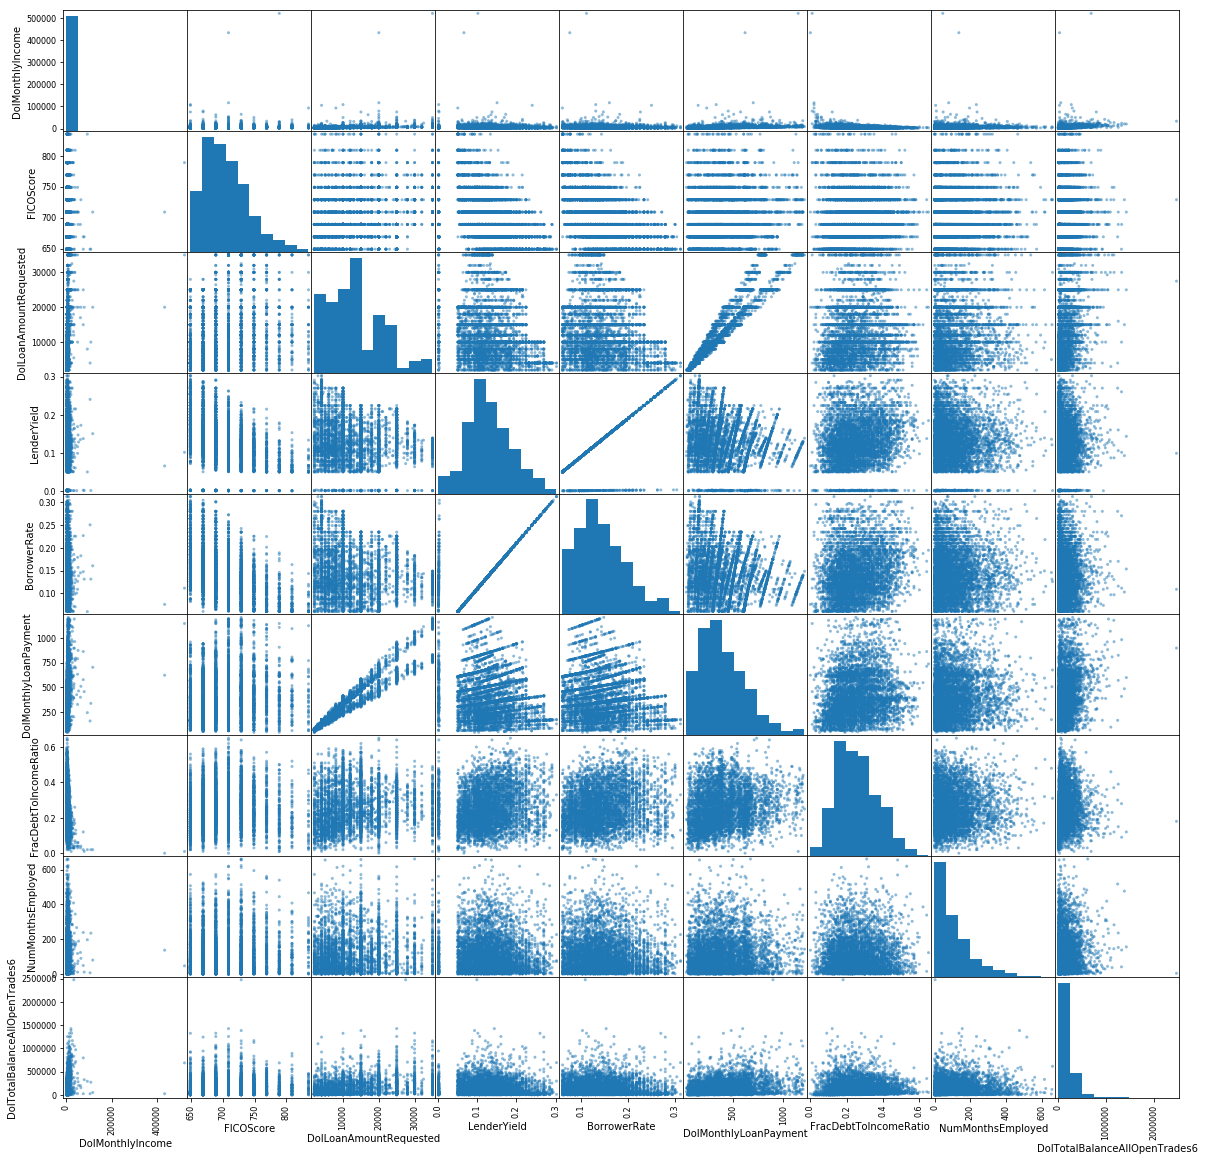

In [157]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(sample[names], figsize=(20,20))
plt.show()

The correlation matrix indicates there are 3 pairs whose correlation coefficient is greater than 0.5 (absolute value).

In [174]:
corr = sample[names].corr()
corr[np.abs(corr)>0.5]

,DolMonthlyIncome,FICOScore,DolLoanAmountRequested,LenderYield,BorrowerRate,DolMonthlyLoanPayment,FracDebtToIncomeRatio,NumMonthsEmployed,DolTotalBalanceAllOpenTrades6
DolMonthlyIncome,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FICOScore,NaN,1.000000,NaN,NaN,-0.525243,NaN,NaN,NaN,NaN
DolLoanAmountRequested,NaN,NaN,1.000000,NaN,NaN,0.941306,NaN,NaN,NaN
LenderYield,NaN,NaN,NaN,1.00000,0.899670,NaN,NaN,NaN,NaN
BorrowerRate,NaN,-0.525243,NaN,0.89967,1.000000,NaN,NaN,NaN,NaN
DolMonthlyLoanPayment,NaN,NaN,0.941306,NaN,NaN,1.000000,NaN,NaN,NaN
FracDebtToIncomeRatio,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
NumMonthsEmployed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
DolTotalBalanceAllOpenTrades6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


We show the scatter plot for the most correlated pairs with label. One interesting finding is Lender Yield has a perfect linear relation with Borrower Rate, except for whose yield equal to zero. All the customer with zero yield are canceled for their loans.

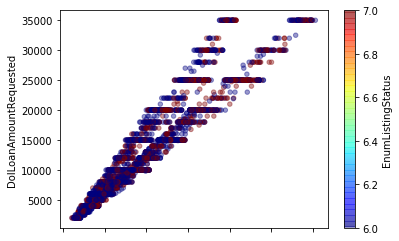

In [169]:
sample.plot.scatter(x="DolMonthlyLoanPayment", y="DolLoanAmountRequested", c="EnumListingStatus", alpha=0.4, cmap=plt.get_cmap("jet"))
plt.show()

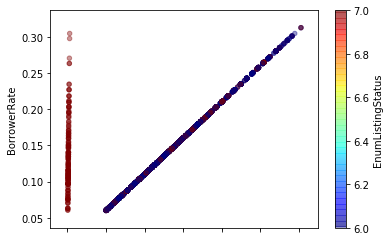

In [166]:
sample.plot.scatter(x="LenderYield", y="BorrowerRate", c="EnumListingStatus", alpha=0.4, cmap=plt.get_cmap("jet"))
plt.show()

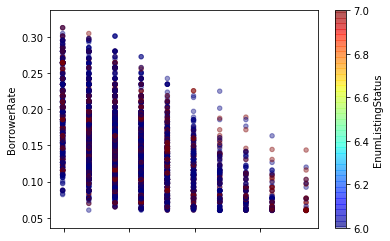

In [170]:
sample.plot.scatter(x="FICOScore", y="BorrowerRate", c="EnumListingStatus", alpha=0.4, cmap=plt.get_cmap("jet"))
plt.show()

# Data Cleaning and Preprocessing
After having a sense of the data, we want to prepare the data for machine lerning models. We drop a number of features based on the following criterias:

1. Sparce values: more than 90 percent of the values in a feature are missing.

2. Highly asymmetric category: more than 98 percent of the values in a feature belong to one category.

3. Large categories: feature contains more than 1000 categories, which would significantly increase the dimensionality after encoded to binary variables.

4. Duplicated features.

In [192]:
del_col = ["ListingNumber", "StrBorrowerCity", "NumOpenTradesDelinqOrPastDue6"]
for col in data.columns:
    if data[col].isnull().sum() > len(data) * 0.9:
        del_col.append(col)
        
data.drop(del_col, axis=1, inplace=True)

Nexe we convert datestamps to numerical values by replacing with the relative days with respective to a fiducial date.

In [6]:
date_col = ['DateCreditPulled', 'DateFirstCredit',
       'DateListingCreation', 'DateListingStart', 'DateWholeLoanStart']
data[date_col] = data[date_col].fillna("2014-01-26 18:28:00")
data[date_col] = data[date_col].astype("datetime64[ns]")

for col in date_col:
    data[col] = (data[col] - data[col].min()) / np.timedelta64(1, 'D')

Convert bool values to binary values.

In [7]:
for col in data.columns:
    if data[col].dtype == "bool":
        data[col] = data[col].astype("int64")

Convert object types to category types.

In [8]:
cat_col = ["EnumListingStatus", "CreditGrade", "EnumListingCategory", "StrEmploymentStatus", "StrOccupation", "StrState", "EnumLoanFractionalType"]
num_col = []
for col in data.columns:
    if col not in cat_col:
        num_col.append(col)

data[cat_col] = data[cat_col].fillna("Other")

for col in cat_col:
    data[col] = data[col].astype("category")
    
data["EnumListingStatus"].cat.categories = [1,0]

Next we randomly separate the data into training set, validation set and test set with ratio 6:3:1. Each set is splitted into features (x) and labels (y).

In [9]:
def split_data(data, valid_ratio, test_ratio, y_column="EnumListingStatus"):
    N = len(data)
    idx = np.random.permutation(N)
    test_cut, valid_cut = int(N * test_ratio), int(N * (valid_ratio + test_ratio))
    train, valid, test = data.iloc[idx[valid_cut:]], data.iloc[idx[test_cut : valid_cut]], data.iloc[idx[:test_cut]]
    return train.drop(y_column, axis=1).copy(), pd.DataFrame(train[y_column]).copy(), valid.drop(y_column, axis=1).copy(), pd.DataFrame(valid[y_column]).copy(), test.drop(y_column, axis=1).copy(), pd.DataFrame(test[y_column]).copy()

train_x, train_y, valid_x, valid_y, test_x, test_y = split_data(data, 0.3, 0.1)

Data preprocessing: we separate numerical and categorical features and treat them separately. For numerical features, we first impute the missing values with the median, then standardize with z score. For categorical features, we impute missing values with "Other" and convert them into binary variables.

In [10]:
cat_col.remove("EnumListingStatus")

int_col, float_col = [], []
for col in data.columns:
    if data[col].dtype == "float64":
        float_col.append(col)
    if data[col].dtype == "int64":
        int_col.append(col)

del(data)

In [11]:
class Preprocessor():
    def __init__(self, num_col, cat_col):
        self.mean, self.std, self.median = dict(), dict(), dict()
        self.num_col, self.cat_col = num_col, cat_col
    def fit(self, X):
        self.mean, self.std, self.median = dict(X[self.num_col].mean()), dict(X[self.num_col].std()), dict(X[self.num_col].median())
        return self
    def transform(self, X):
        for col in self.num_col:
            X[col].fillna(self.median[col], inplace=True)
            X[col] = (X[col] - self.mean[col]) / self.std[col]
        return pd.get_dummies(X)

In [12]:
preprocessor = Preprocessor(num_col, cat_col)
preprocessor.fit(train_x)
train_x, valid_x, test_x = preprocessor.transform(train_x), preprocessor.transform(valid_x), preprocessor.transform(test_x)

After preprocessing, we have 213 features. The majority of them are binary variables converting from categorical values.

In [194]:
train_x.head(10)

,DateCreditPulled,DateListingStart,DateListingCreation,DolLoanAmountRequested,BoolPartialFundingApproved,LenderYield,BorrowerRate,NumMonthsTerm,DolMonthlyLoanPayment,FICOScore,ProsperScore,DolMonthlyIncome,BoolIncomeVerifiable,FracDebtToIncomeRatio,NumMonthsEmployed,NumPriorProsperLoansActive,NumPriorProsperLoans,BoolIsLender,BoolInGroup,EnumChannelCode,NumTrades,NumTradesOpened6,NumTradesDelinqOrPastDue6,NumTradesCurr30DPDOrDerog6,NumTradesEver90DPDOrDerog,DolTotalBalanceAllOpenTrades6,DolTotalBalanceOnPublicRecords,DolTotalPaymentAllOpenTrades6,AgeOldestTrade,NumInquiries6MinusLastTwoWeeks,PctTradesNeverDelinquent,NumBankcardTradesOpened12,DolTotalAvailBankcardCredit6,DolTotalBalanceInstallTradesReptd6,NumRealEstateTrades,NumRealPropertyTrades,DolTotalBalanceOpenRevolving6,NumTradesEverDerog,DolMonthlyDebt,NumCurrentDelinquencies,NumDelinquencies84,NumPublicRecordsLast10Years,NumPublicRecords12,DateFirstCredit,NumCreditLines84,NumInquiries6,DolAmountDelinquent,NumCurrentCreditLines,NumOpenCreditLines,PctBankcardUtil,NumOpenRevolvingAccounts,DolRealEstateBalance,DolRevolvingBalance,DolRealEstatePayment,NumTotalInquiries,NumSatisfactoryAccounts,NumWasDelinquentDerog,NumDelinquenciesOver30Days,NumDelinquenciesOver60Days,BoolOwnsHome,DateWholeLoanStart,BoolEverWholeLoan,BoolIsFractionalLoan,CreditGrade_A,CreditGrade_AA,CreditGrade_B,CreditGrade_C,CreditGrade_D,CreditGrade_E,CreditGrade_HR,EnumListingCategory_0,EnumListingCategory_1,EnumListingCategory_2,EnumListingCategory_3,EnumListingCategory_6,EnumListingCategory_7,EnumListingCategory_8,EnumListingCategory_9,EnumListingCategory_11,EnumListingCategory_12,EnumListingCategory_13,EnumListingCategory_14,EnumListingCategory_15,EnumListingCategory_16,EnumListingCategory_17,EnumListingCategory_18,EnumListingCategory_19,EnumListingCategory_20,EnumListingCategory_21,StrEmploymentStatus_Employed,StrEmploymentStatus_Full-time,StrEmploymentStatus_Not employed,StrEmploymentStatus_Other,StrEmploymentStatus_Part-time,StrEmploymentStatus_Self-employed,StrOccupation_Accountant/CPA,StrOccupation_Administrative Assistant,StrOccupation_Analyst,StrOccupation_Architect,StrOccupation_Attorney,StrOccupation_Biologist,StrOccupation_Bus Driver,StrOccupation_Car Dealer,StrOccupation_Chemist,StrOccupation_Civil Service,StrOccupation_Clergy,StrOccupation_Clerical,StrOccupation_Computer Programmer,StrOccupation_Construction,StrOccupation_Dentist,StrOccupation_Doctor,StrOccupation_Engineer - Chemical,StrOccupation_Engineer - Electrical,StrOccupation_Engineer - Mechanical,StrOccupation_Executive,StrOccupation_Fireman,StrOccupation_Flight Attendant,StrOccupation_Food Service,StrOccupation_Food Service Management,StrOccupation_Homemaker,StrOccupation_Investor,StrOccupation_Judge,StrOccupation_Laborer,StrOccupation_Landscaping,StrOccupation_Medical Technician,StrOccupation_Military Enlisted,StrOccupation_Military Officer,StrOccupation_Nurse (LPN),StrOccupation_Nurse (RN),StrOccupation_Nurse's Aide,StrOccupation_Other,StrOccupation_Pharmacist,StrOccupation_Pilot - Private/Commercial,StrOccupation_Police Officer/Correction Officer,StrOccupation_Postal Service,StrOccupation_Principal,StrOccupation_Professional,StrOccupation_Professor,StrOccupation_Psychologist,StrOccupation_Realtor,StrOccupation_Religious,StrOccupation_Retail Management,StrOccupation_Sales - Commission,StrOccupation_Sales - Retail,StrOccupation_Scientist,StrOccupation_Skilled Labor,StrOccupation_Social Worker,StrOccupation_Student - College Freshman,StrOccupation_Student - College Graduate Student,StrOccupation_Student - College Junior,StrOccupation_Student - College Senior,StrOccupation_Student - College Sophomore,StrOccupation_Student - Community College,StrOccupation_Student - Technical School,StrOccupation_Teacher,StrOccupation_Teacher's Aide,StrOccupation_Tradesman - Carpenter,StrOccupation_Tradesman - Electrician,StrOccupation_Tradesman - Mechanic,StrOccupation_Tradesman - Plumber,StrOccupation_Truck Driver,StrOccupation_Waiter/Waitress,StrS

In [13]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151482 entries, 1276613 to 2129816
Columns: 213 entries, DateCreditPulled to EnumLoanFractionalType_3
dtypes: float64(14), int64(49), uint8(150)
memory usage: 95.6 MB


# Experiment with different models
Now the data is prepared to be feed into ML models. We first try a number of classifiers without parameter tuning (using the default hyperparameters) and see their performance.

In [14]:
from sklearn.linear_model import LogisticRegression
model_lr, test_model_lr = LogisticRegression(), LogisticRegression()
model_lr.fit(np.array(train_x), np.array(train_y).reshape(-1))
test_model_lr.fit(np.array(pd.concat([train_x,valid_x])), np.array(pd.concat([train_y, valid_y])).reshape(-1))
print("in sample acc = ", model_lr.score(np.array(train_x), np.array(train_y).reshape(-1))) 
print("out of sample acc = ", model_lr.score(np.array(valid_x), np.array(valid_y).reshape(-1)))

in sample acc =  0.6697495412
out of sample acc =  0.670865185303


In [15]:
from sklearn.naive_bayes import BernoulliNB
model_nb, test_model_nb = BernoulliNB(), BernoulliNB()
model_nb.fit(np.array(train_x), np.array(train_y).reshape(-1))
test_model_nb.fit(np.array(pd.concat([train_x,valid_x])), np.array(pd.concat([train_y, valid_y])).reshape(-1))
print("in sample acc = ", model_nb.score(np.array(train_x), np.array(train_y).reshape(-1))) 
print("out of sample acc = ", model_nb.score(np.array(valid_x), np.array(valid_y).reshape(-1)))

in sample acc =  0.654090915092
out of sample acc =  0.654586023422


In [16]:
from sklearn.tree import DecisionTreeClassifier
model_tree, test_model_tree = DecisionTreeClassifier(), DecisionTreeClassifier()
model_tree.fit(np.array(train_x), np.array(train_y).reshape(-1))
test_model_tree.fit(np.array(pd.concat([train_x,valid_x])), np.array(pd.concat([train_y, valid_y])).reshape(-1))
print("in sample acc = ", model_tree.score(np.array(train_x), np.array(train_y).reshape(-1))) 
print("out of sample acc = ", model_tree.score(np.array(valid_x), np.array(valid_y).reshape(-1)))

in sample acc =  1.0
out of sample acc =  0.630503954265


In [17]:
from sklearn.ensemble import RandomForestClassifier
model_rf, test_model_rf = RandomForestClassifier(), RandomForestClassifier()
model_rf.fit(np.array(train_x), np.array(train_y).reshape(-1))
test_model_rf.fit(np.array(pd.concat([train_x,valid_x])), np.array(pd.concat([train_y, valid_y])).reshape(-1))
print("in sample acc = ", model_rf.score(np.array(train_x), np.array(train_y).reshape(-1))) 
print("out of sample acc = ", model_rf.score(np.array(valid_x), np.array(valid_y).reshape(-1)))

in sample acc =  0.990111036295
out of sample acc =  0.679249019686


In [18]:
from sklearn.ensemble import GradientBoostingClassifier
model_gbdt, test_model_gbdt = GradientBoostingClassifier(), GradientBoostingClassifier()
model_gbdt.fit(np.array(train_x), np.array(train_y).reshape(-1))
test_model_gbdt.fit(np.array(pd.concat([train_x,valid_x])), np.array(pd.concat([train_y, valid_y])).reshape(-1))
print("in sample acc = ", model_gbdt.score(np.array(train_x), np.array(train_y).reshape(-1))) 
print("out of sample acc = ", model_gbdt.score(np.array(valid_x), np.array(valid_y).reshape(-1)))

in sample acc =  0.726614383227
out of sample acc =  0.727452766665


In [19]:
from sklearn.ensemble import AdaBoostClassifier
model_ada, test_model_ada = AdaBoostClassifier(), AdaBoostClassifier()
model_ada.fit(np.array(train_x), np.array(train_y).reshape(-1))
test_model_ada.fit(np.array(pd.concat([train_x,valid_x])), np.array(pd.concat([train_y, valid_y])).reshape(-1))
print("in sample acc = ", model_ada.score(np.array(train_x), np.array(train_y).reshape(-1))) 
print("out of sample acc = ", model_ada.score(np.array(valid_x), np.array(valid_y).reshape(-1)))

in sample acc =  0.72385497947
out of sample acc =  0.724957420684


We find that the best performers are adaboost and gradient boosting trees. Overfitting happens with single decision tree and random forest. 

Next we plot the ROC curves for different models and calculate their aum respectively.

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [21]:
valid_y_prob = {
     "lr" : model_lr.predict_proba(np.array(valid_x))[:,1],
     "nb" : model_nb.predict_proba(np.array(valid_x))[:,1],
     "tree" : model_tree.predict_proba(np.array(valid_x))[:,1],
     "rf" : model_rf.predict_proba(np.array(valid_x))[:,1],
     "gbdt" : model_gbdt.predict_proba(np.array(valid_x))[:,1],
     "ada" : model_ada.predict_proba(np.array(valid_x))[:,1],
    }

model_list = {
    "lr" : "LogisticRegression",
    "nb" : "NaiveBayes",
    "tree" : "DecisionTree",
    "rf" : "RandomForest",
    "gbdt" : "GradientBoosted",
    "ada" : "AdaBoost"
    }

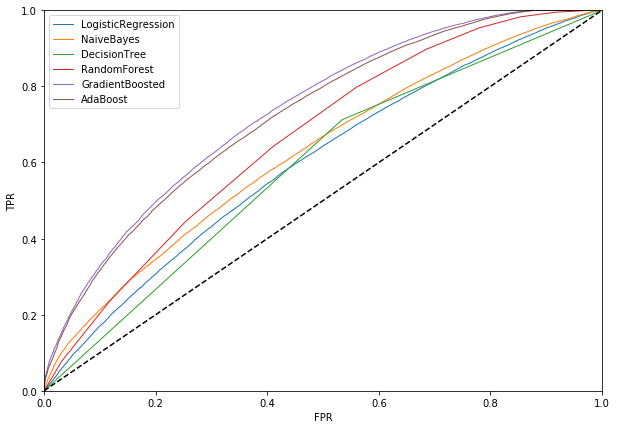

In [22]:
plt.figure(figsize=(10,7))
for model in valid_y_prob:
    fpr, tpr, thresholds = roc_curve(np.array(valid_y).reshape(-1), valid_y_prob[model])
    plt.plot(fpr, tpr, linewidth=1, label=model_list[model])
plt.plot([0,1],[0,1], 'k--')
plt.axis([0,1,0,1])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

In [23]:
valid_auc = pd.Series()
for model in valid_y_prob:
    valid_auc[model] = roc_auc_score(np.array(valid_y).reshape(-1), valid_y_prob[model])
valid_auc.sort_values()

tree    0.589142
lr      0.599757
nb      0.625117
rf      0.664699
ada     0.725160
gbdt    0.735936
dtype: float64

# Parameter Tuning
We tune the hyperparameters by selecting a smaller sample set instead of the whole data set. This is done in another iPython notebook. Here we directly use the optimal parameters to retrain the models.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf1, test_model_rf1 = RandomForestClassifier(n_estimators=1000, max_features="sqrt", max_depth=10, n_jobs=6), RandomForestClassifier(n_estimators=1000, max_features="sqrt", max_depth=10)
model_rf1.fit(np.array(train_x), np.array(train_y).reshape(-1))
test_model_rf1.fit(np.array(pd.concat([train_x,valid_x])), np.array(pd.concat([train_y, valid_y])).reshape(-1))
roc_auc_score(np.array(valid_y).reshape(-1), model_rf1.predict_proba(np.array(valid_x))[:,1])

In [25]:
from sklearn.tree import DecisionTreeClassifier
model_tree1, test_model_tree1 = DecisionTreeClassifier(max_depth=8), DecisionTreeClassifier(max_depth=8)
model_tree1.fit(np.array(train_x), np.array(train_y).reshape(-1))
test_model_tree1.fit(np.array(pd.concat([train_x,valid_x])), np.array(pd.concat([train_y, valid_y])).reshape(-1))
roc_auc_score(np.array(valid_y).reshape(-1), model_tree1.predict_proba(np.array(valid_x))[:,1])

0.6986881910686461

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
model_gbdt1,test_model_gbdt1 = GradientBoostingClassifier(n_estimators=300, max_features="sqrt", max_depth=4, learning_rate=0.07), GradientBoostingClassifier(n_estimators=300, max_features="sqrt", max_depth=4, learning_rate=0.07)
model_gbdt1.fit(np.array(train_x), np.array(train_y).reshape(-1))
test_model_gbdt1.fit(np.array(pd.concat([train_x,valid_x])), np.array(pd.concat([train_y, valid_y])).reshape(-1))
roc_auc_score(np.array(valid_y).reshape(-1), model_gbdt1.predict_proba(np.array(valid_x))[:,1])

0.7420759866882396

In [27]:
from sklearn.ensemble import AdaBoostClassifier
model_ada1, test_model_ada1 = AdaBoostClassifier(n_estimators=300, learning_rate=0.3), AdaBoostClassifier(n_estimators=300, learning_rate=0.3)
model_ada1.fit(np.array(train_x), np.array(train_y).reshape(-1))
test_model_ada1.fit(np.array(pd.concat([train_x,valid_x])), np.array(pd.concat([train_y, valid_y])).reshape(-1))
roc_auc_score(np.array(valid_y).reshape(-1), model_ada1.predict_proba(np.array(valid_x))[:,1])

0.73315205208825318

In [28]:
from sklearn.linear_model import LogisticRegression
model_lr1, test_model_lr1 = LogisticRegression(C=0.1, penalty="l1"), LogisticRegression(C=0.1, penalty="l1")
model_lr1.fit(np.array(train_x), np.array(train_y).reshape(-1))
test_model_lr1.fit(np.array(pd.concat([train_x,valid_x])), np.array(pd.concat([train_y, valid_y])).reshape(-1))
roc_auc_score(np.array(valid_y).reshape(-1), model_lr1.predict_proba(np.array(valid_x))[:,1])

0.71542539666234573

In [29]:
valid_y_prob = {
     "lr" : model_lr.predict_proba(np.array(valid_x))[:,1],
     "lr1" : model_lr1.predict_proba(np.array(valid_x))[:,1],
     "nb" : model_nb.predict_proba(np.array(valid_x))[:,1],
     "tree" : model_tree.predict_proba(np.array(valid_x))[:,1],
     "tree1" : model_tree1.predict_proba(np.array(valid_x))[:,1],
     "rf" : model_rf.predict_proba(np.array(valid_x))[:,1],
     "rf1" : model_rf1.predict_proba(np.array(valid_x))[:,1],
     "gbdt" : model_gbdt.predict_proba(np.array(valid_x))[:,1],
     "gbdt1" : model_gbdt1.predict_proba(np.array(valid_x))[:,1],
     "ada" : model_ada.predict_proba(np.array(valid_x))[:,1],
     "ada1" : model_ada1.predict_proba(np.array(valid_x))[:,1],
    }

test_y_prob = {
     "lr" : test_model_lr.predict_proba(np.array(test_x))[:,1],
     "lr1" : test_model_lr1.predict_proba(np.array(test_x))[:,1],
     "nb" : test_model_nb.predict_proba(np.array(test_x))[:,1],
     "tree" : test_model_tree.predict_proba(np.array(test_x))[:,1],
     "tree1" : test_model_tree1.predict_proba(np.array(test_x))[:,1],
     "rf" : test_model_rf.predict_proba(np.array(test_x))[:,1],
     "rf1" : test_model_rf1.predict_proba(np.array(test_x))[:,1],
     "gbdt" : test_model_gbdt.predict_proba(np.array(test_x))[:,1],
     "gbdt1" : test_model_gbdt1.predict_proba(np.array(test_x))[:,1],
     "ada" : test_model_ada.predict_proba(np.array(test_x))[:,1],
     "ada1" : test_model_ada1.predict_proba(np.array(test_x))[:,1]
    }

model_list = {
    "lr" : "LogisticRegression",
    "lr1" : "LogisticRegression1",
    "nb" : "NaiveBayes",
    "tree" : "DecisionTree",
    "tree1" : "DecisionTree1",
    "rf" : "RandomForest",
    "rf1" : "RandomForest1",
    "gbdt" : "GradientBoosted",
    "gbdt1" : "GradientBoosted1",
    "ada" : "AdaBoost",
    "ada1" : "AdaBoost1"
    }

Model performance is improved after parameter tuning.

In [30]:
valid_auc = pd.Series()
for model in valid_y_prob:
    valid_auc[model] = roc_auc_score(np.array(valid_y).reshape(-1), valid_y_prob[model])
valid_auc.sort_values()

tree     0.589142
lr       0.599757
nb       0.625117
rf       0.664699
tree1    0.698688
lr1      0.715425
ada      0.725160
rf1      0.726906
ada1     0.733152
gbdt     0.735936
gbdt1    0.742076
dtype: float64

Next we stack all the models together into a stronger predictor. To do this, we train another GBDT. The stacked model is trained on valid_y and predict on test_y.

In [34]:
valid_y_prob = pd.DataFrame(valid_y_prob, index=valid_y.index)
valid_y_prob.head()

,ada,ada1,gbdt,gbdt1,lr,lr1,nb,rf,rf1,tree,tree1
ListingID,,,,,,,,,,,
1312183,0.510456,0.505188,0.796300,0.864726,0.654930,0.926912,0.938568,0.9,0.771796,1.0,0.793934
2200338,0.503977,0.501935,0.641542,0.648769,0.632474,0.733388,0.491413,0.5,0.619463,0.0,0.649104
1205087,0.505963,0.503394,0.751367,0.791686,0.662563,0.697536,0.601810,0.7,0.728691,1.0,0.727706
2123058,0.506682,0.503741,0.751341,0.819281,0.744938,0.776536,0.455445,0.9,0.729697,1.0,0.792138
1709965,0.502641,0.501291,0.635449,0.656482,0.670231,0.684623,0.402785,0.6,0.632431,1.0,0.649104


In [35]:
test_y_prob = pd.DataFrame(test_y_prob, index=test_y.index)
test_y_prob.head()

,ada,ada1,gbdt,gbdt1,lr,lr1,nb,rf,rf1,tree,tree1
ListingID,,,,,,,,,,,
1201458,0.498310,0.499121,0.544651,0.582223,0.611263,0.394693,0.081454,0.6,0.568699,1.0,0.697987
1055553,0.497166,0.498638,0.454224,0.388659,0.562558,0.391153,0.334352,0.3,0.518050,0.0,0.493279
1348629,0.502671,0.501537,0.639734,0.639936,0.631637,0.649875,0.831366,0.4,0.653362,1.0,0.651763
1849159,0.493140,0.496185,0.254393,0.176621,0.567096,0.663667,0.514772,0.1,0.404503,0.0,0.583608
1435990,0.509962,0.504982,0.829557,0.798015,0.654226,0.770624,0.921355,0.3,0.745390,0.0,0.735027


In [43]:
from sklearn.ensemble import GradientBoostingClassifier
model_stack = GradientBoostingClassifier(max_depth=3, n_estimators=100, learning_rate=0.1)
model_stack.fit(np.array(valid_y_prob), np.array(valid_y).reshape(-1))
print("in sample auc = ", roc_auc_score(np.array(valid_y).reshape(-1), model_stack.predict_proba(np.array(valid_y_prob))[:,1]))
print("out of sample auc = ", roc_auc_score(np.array(test_y).reshape(-1), model_stack.predict_proba(np.array(test_y_prob))[:,1]))

in sample auc =  0.750154483744
out of sample auc =  0.740157798736


In [48]:
test_y_prob = {
     "lr" : test_model_lr.predict_proba(np.array(test_x))[:,1],
     "lr1" : test_model_lr1.predict_proba(np.array(test_x))[:,1],
     "nb" : test_model_nb.predict_proba(np.array(test_x))[:,1],
     "tree" : test_model_tree.predict_proba(np.array(test_x))[:,1],
     "tree1" : test_model_tree1.predict_proba(np.array(test_x))[:,1],
     "rf" : test_model_rf.predict_proba(np.array(test_x))[:,1],
     "rf1" : test_model_rf1.predict_proba(np.array(test_x))[:,1],
     "gbdt" : test_model_gbdt.predict_proba(np.array(test_x))[:,1],
     "gbdt1" : test_model_gbdt1.predict_proba(np.array(test_x))[:,1],
     "ada" : test_model_ada.predict_proba(np.array(test_x))[:,1],
     "ada1" : test_model_ada1.predict_proba(np.array(test_x))[:,1],
     "stack" : model_stack.predict_proba(np.array(test_y_prob))[:,1]
    }

model_list = {
    "lr" : "LogisticRegression",
    "lr1" : "LogisticRegression1",
    "nb" : "NaiveBayes",
    "tree" : "DecisionTree",
    "tree1" : "DecisionTree1",
    "rf" : "RandomForest",
    "rf1" : "RandomForest1",
    "gbdt" : "GradientBoosted",
    "gbdt1" : "GradientBoosted1",
    "ada" : "AdaBoost",
    "ada1" : "AdaBoost1",
    "stack" : "Ensemble"
    }

We can see that the stacked model has a better auc than the best single model. However, stacking only improves the performance by a little. This is due to the fact that the models in the ensemble are not diversified and most of them are tree related models.

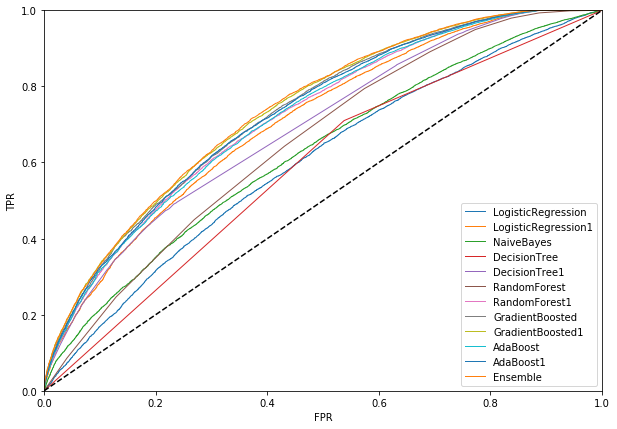

In [51]:
plt.figure(figsize=(10,7))
for model in test_y_prob:
    fpr, tpr, thresholds = roc_curve(np.array(test_y).reshape(-1), test_y_prob[model])
    plt.plot(fpr, tpr, linewidth=1, label=model_list[model])
plt.plot([0,1],[0,1], 'k--')
plt.axis([0,1,0,1])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

In [50]:
test_auc = pd.Series()
for model in test_y_prob:
    test_auc[model] = roc_auc_score(np.array(test_y).reshape(-1), test_y_prob[model])
test_auc.sort_values()

tree     0.586216
lr       0.600649
nb       0.623762
rf       0.654129
tree1    0.692102
lr1      0.708981
ada      0.721427
rf1      0.721441
ada1     0.728720
gbdt     0.730794
gbdt1    0.737987
stack    0.740158
dtype: float64

Next we present the relative importance for the features, which is measured by the contribution to the improvement of impurity function of GBDT from each split.

In [85]:
importance_gbdt = pd.Series(test_model_gbdt1.feature_importances_, index=train_x.columns)
importance_gbdt.sort_values(ascending=False, inplace=True)

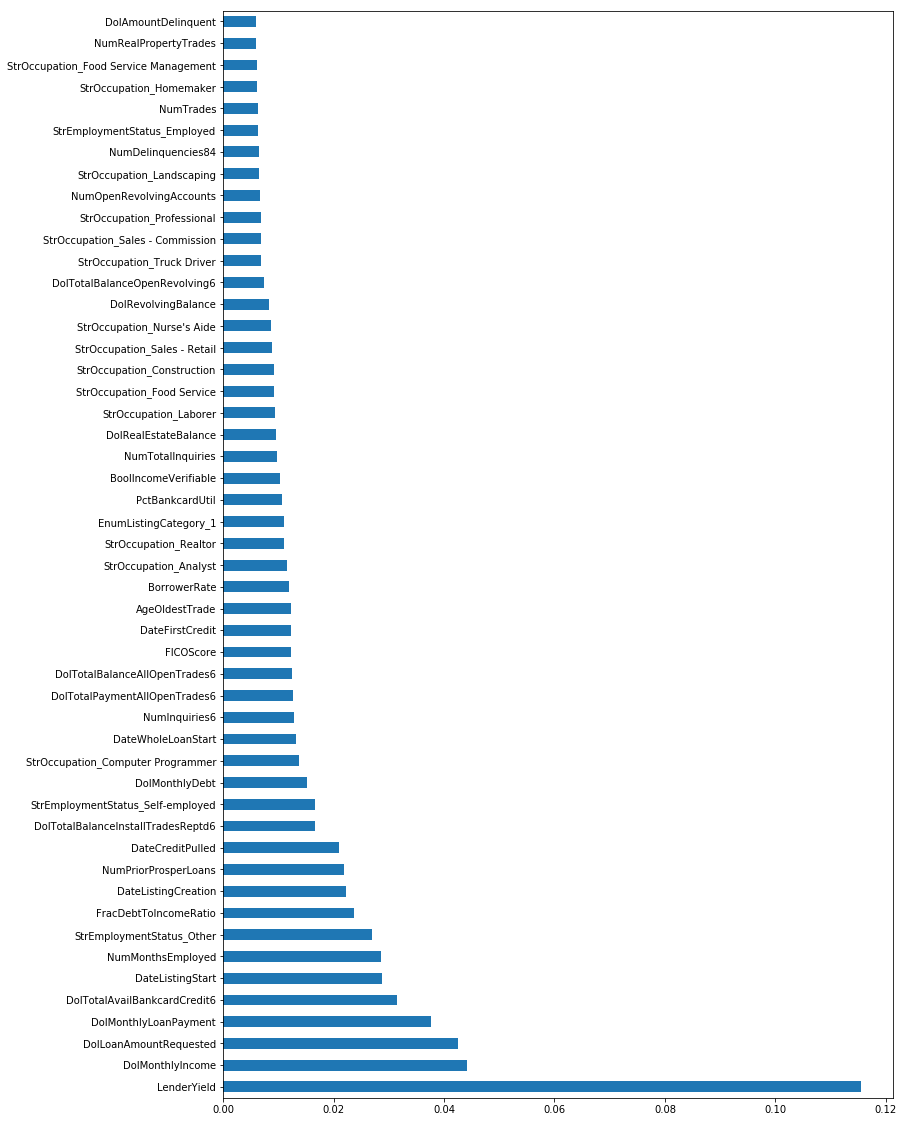

In [90]:
plt.figure(figsize=(12,20))
importance_gbdt[0:50].plot(kind="barh")
plt.show()

From the histogram above, the top 5 features are LenderYield, MonthlyIncome, LoanAmountRequested, MonthlyLoanPayment and TotalAvailBankcardCredit. Most of them are included in our selected key features at the beginning, which means the result corresponds to our emperical prior knowledge. Among them, Lender Yield has the largest contribution, which can be explained by the previous finding: all customers with a 0 Lender Yield are canceled the loan, with no exception.